In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from langdetect import detect_langs , detect
from textblob import TextBlob
from textblob import TextBlob, Word
from nltk.corpus import stopwords
import re
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import spacy
import nltk
from sklearn.feature_extraction.text import  CountVectorizer
warnings.filterwarnings("ignore")

# sklearn.model_selection.train_test_split¶
import gensim
from gensim.utils import simple_preprocess

from nltk.corpus import stopwords


In [6]:
import pandas as pd
df = pd.read_csv('C:\\Users\\ankur\\Documents\\Data Science\\Projects\\Capstone\\yelp_dataset\\yelp-json-all\\master_dataset.csv')
df.drop('Unnamed: 0', inplace = True, axis = 1)
print('total reviews:',len(df))
df.head()

total reviews: 454427


,business_id,review_id,text,stars,cool,date,funny,useful,user_id,comp_name,address,postal_code,city,state,NAICS,label,word_count,Lang
0,eU_713ec6fTGNO4BegRaww,fdiNeiN_hoCxCMy2wTRW9g,I'll be the first to admit that I was not exci...,4,0,1/20/13 13:25,0,0,w31MKYsNFMrjhWxxAb5wIw,La Tavola Italiana,1 Boggs Ave,15211.0,Pittsburgh,PA,Accommodation and Food Services,1,295,en
1,Mem13A3C202RzT53npn4NA,IPw8yWiyqnfBzzWmypUHgg,If you are looking for the best pierogies in P...,5,9,5/13/17 10:41,6,9,5JVY32_bmTBfIGpCCsnAfw,Pierogies Plus,342 Island Ave,15136.0,McKees Rocks,PA,Accommodation and Food Services,1,138,en
2,Gyrez6K8f1AyR7dzW9fvAw,qm97yMwREr7BKkexlwLFbg,their pettuccine was fresh-made in the morning...,5,1,12/28/13 22:28,0,0,TTRVdTXKcq-xn6-1IWbwEw,Casanova,"3377 S Las Vegas Blvd, Ste 2170",89109.0,Las Vegas,NV,Accommodation and Food Services,1,33,en
3,CDpoJiqgM04wqQTZ6QkTqQ,CelUWzp-GnJIiiV1mDUb-g,Love this place downtown but the Scottsdale lo...,1,0,12/5/15 2:37,0,0,tFICmdLtwgFIRcwtlbYQOg,Squid Ink,"7318 E Shea Blvd, Ste 101",85260.0,Scottsdale,AZ,Accommodation and Food Services,0,34,en
4,3JxKzWquEbPC3yPIfoCiLw,hUUfzKeDLo930LA9-v2tWQ,Best chinese resto. Highly recommended. 5 star...,5,0,3/7/16 1:03,0,0,uFVAAe0JC81IPmxgT49Hcw,Eest Asian Bistro,"3145 N Dysart Rd, Ste C102",85392.0,Avondale,AZ,Accommodation and Food Services,1,27,en


# https://towardsdatascience.com/unsupervised-nlp-topic-models-as-a-supervised-learning-input-cf8ee9e5cf28

In [7]:
df11 = df.copy()

In [69]:
df = df.iloc[:1000,:]
df["label"].value_counts()

1    793
0    207
Name: label, dtype: int64

In [17]:
stop_words = stopwords.words('english')
stop_words.extend(['yelp', 'www','biz photo','yelp com biz','www yelp','biz photo','com biz',
                   'biz','yr','http','ac','au','asu','az','bc','br'])

def strip_newline(series):
    series = series.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))  ### lemmatize
    return [review.replace('\n','') for review in series]

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def bigrams(words, bi_min=15, tri_min=10):
    bigram = gensim.models.Phrases(words, min_count = bi_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod
    
def get_corpus(df):
    df.text = strip_newline(df.text)
    words = list(sent_to_words(df.text))
    words = remove_stopwords(words)
    bigram_mod = bigrams(words)
    bigram = [bigram_mod[review] for review in words]
    id2word = gensim.corpora.Dictionary(bigram)
    id2word.filter_extremes(no_below=10, no_above=0.35)
    id2word.compactify()
    corpus = [id2word.doc2bow(text) for text in bigram]
    return corpus, id2word, bigram

train_corpus, train_id2word, bigram_train = get_corpus(df)

In [19]:
bigram_train[0]

['first',
 'admit',
 'wa',
 'excited',
 'going',
 'la',
 'tavolta',
 'food',
 'snob',
 'group',
 'friend',
 'suggested',
 'go',
 'dinner',
 'looked',
 'online',
 'menu',
 'wa',
 'nothing',
 'special',
 'seemed',
 'overpriced',
 'im',
 'also',
 'big',
 'ordering',
 'pasta',
 'go',
 'alas',
 'wa',
 'outnumbered',
 'thank',
 'goodness',
 'ordered',
 'sea',
 'bass',
 'special',
 'wa',
 'die',
 'cooked',
 'perfectly',
 'seasoned',
 'perfectly',
 'perfect',
 'portion',
 'say',
 'enough',
 'good',
 'thing',
 'dish',
 'server',
 'asked',
 'wa',
 'seemed',
 'proud',
 'dish',
 'said',
 'chef',
 'incredible',
 'job',
 'hubby',
 'got',
 'crab',
 'tortellini',
 'also',
 'loved',
 'heard',
 'mmmm',
 'good',
 'around',
 'table',
 'waiter',
 'wa',
 'super',
 'nice',
 'even',
 'gave',
 'free',
 'dessert',
 'last',
 'people',
 'restaurant',
 'service',
 'wa',
 'slow',
 'place',
 'wa',
 'packed',
 'jug',
 'wine',
 'large',
 'group',
 'good',
 'conversation',
 'seem',
 'bother',
 'anyone',
 'order',
 'cal

In [21]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    lda_train = gensim.models.ldamulticore.LdaMulticore(
                           corpus=train_corpus,
                           num_topics=20,
                           id2word=train_id2word,
                           chunksize=100,
                           workers=7, # Num. Processing Cores - 1
                           passes=50,
                           eval_every = 1,
                           per_word_topics=True)
    lda_train.save('lda_train.model')

In [24]:
df.text[0]

'I\'ll be the first to admit that I wa not excited about going to La Tavolta. Being a food snob, when a group of friend suggested we go for dinner I looked online at the menu and to me there wa nothing special and it seemed overpriced. Im also not big on ordering pasta when I go out. Alas, I wa outnumbered. Thank goodness! I ordered the sea bass special. It wa to die for. Cooked perfectly, seasoned perfectly, perfect portion. I can not say enough good thing about this dish. When the server asked how it wa he seemed very proud of the dish and said, " doesn\'t she (the chef) do an incredible job?" She does. My hubby got the crab tortellini and also loved his. I heard "mmmm this is so good" from all around the table. Our waiter wa super nice and even gave u free dessert because we were some of the last people in the restaurant. Service wa very slow and the place wa PACKED but we had our jug of wine and a large group with good conversation so it didn\'t seem to bother anyone.So-Do order th

In [57]:
lda_train.print_topics(20,num_words=15)[:]
# len(lda_train.print_topics(20,num_words=15)[0])

[(0,
  '0.047*"salad" + 0.020*"bread" + 0.018*"garlic" + 0.018*"night" + 0.016*"delicious" + 0.016*"little" + 0.015*"club" + 0.015*"dressing" + 0.014*"wine" + 0.012*"price" + 0.011*"service" + 0.011*"cooked" + 0.011*"order" + 0.011*"end" + 0.011*"steak"'),
 (1,
  '0.017*"birthday" + 0.016*"back" + 0.015*"even" + 0.015*"cake" + 0.014*"came" + 0.014*"took" + 0.011*"first" + 0.010*"better" + 0.010*"never" + 0.010*"take" + 0.010*"old" + 0.010*"absolutely" + 0.010*"restaurant" + 0.009*"son" + 0.009*"time"'),
 (2,
  '0.035*"meal" + 0.025*"like" + 0.021*"favorite" + 0.020*"best" + 0.019*"toast" + 0.019*"amazing" + 0.018*"pricey" + 0.017*"breakfast" + 0.016*"great" + 0.015*"even" + 0.013*"used" + 0.013*"closed" + 0.013*"mushroom" + 0.013*"trying" + 0.012*"pretty"'),
 (3,
  '0.051*"buffet" + 0.024*"go" + 0.019*"dog" + 0.018*"amazing" + 0.018*"like" + 0.017*"new" + 0.017*"great" + 0.016*"ha" + 0.016*"beer" + 0.014*"really" + 0.013*"spot" + 0.013*"always" + 0.013*"flavors" + 0.012*"went" + 0.012*

In [27]:
train_vecs = []
for i in range(len(df)):
    top_topics = lda_train.get_document_topics(train_corpus[i], minimum_probability=0.0)
    topic_vec = [top_topics[i][1] for i in range(20)]
    topic_vec.extend([df.iloc[i].count()]) # counts of reviews for restaurant
    topic_vec.extend([len(df.iloc[i].text)]) # length review
    train_vecs.append(topic_vec)

In [68]:
topic_vec

[0.0005154997,
 0.0005154997,
 0.0005154997,
 0.0005154997,
 0.0005154997,
 0.0005154997,
 0.0005154997,
 0.0005154997,
 0.0005154997,
 0.0005154997,
 0.0005154997,
 0.6149503,
 0.0005154997,
 0.0005154997,
 0.0005154997,
 0.0005154997,
 0.0005154997,
 0.0005154997,
 0.37577072,
 0.0005154997,
 18,
 1519]

In [36]:
import pickle
import gensim
import pyLDAvis
import pyLDAvis.gensim
import spacy
import pandas as pd
import nltk; nltk.download('stopwords')
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import re
import warnings
from pprint import pprint
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
%config InlineBackend.figure_formats = ['retina']
from sklearn.metrics import f1_score
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import fbeta_score
import matplotlib.pyplot as plt

C:\Users\ankur\Anaconda3\lib\site-packages\past\types\oldstr.py:33: DeprecationWarning: invalid escape sequence \d
  """
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ankur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
X = np.array(train_vecs)
y = np.array(df.label)

kf = KFold(5, shuffle=True, random_state=42)
cv_lr_f1, cv_lrsgd_f1, cv_svcsgd_f1,  = [], [], []

for train_ind, val_ind in kf.split(X, y):
    # Assign CV IDX
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]
    
    # Scale Data
    scaler = StandardScaler()
    X_train_scale = scaler.fit_transform(X_train)
    X_val_scale = scaler.transform(X_val)

    # Logisitic Regression
    lr = LogisticRegression(
        class_weight= 'balanced',
        solver='newton-cg',
        fit_intercept=True
    ).fit(X_train_scale, y_train)

    y_pred = lr.predict(X_val_scale)
    cv_lr_f1.append(f1_score(y_val, y_pred, average='binary'))
    
    # Logistic Regression SGD
    sgd = linear_model.SGDClassifier(
        max_iter=1000,
        tol=1e-3,
        loss='log',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd.predict(X_val_scale)
    cv_lrsgd_f1.append(f1_score(y_val, y_pred, average='binary'))
    
    # SGD Modified Huber
    sgd_huber = linear_model.SGDClassifier(
        max_iter=1000,
        tol=1e-3,
        alpha=20,
        loss='modified_huber',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd_huber.predict(X_val_scale)
    cv_svcsgd_f1.append(f1_score(y_val, y_pred, average='binary'))

print(f'Logistic Regression Val f1: {np.mean(cv_lr_f1):.3f} +- {np.std(cv_lr_f1):.3f}')
print(f'Logisitic Regression SGD Val f1: {np.mean(cv_lrsgd_f1):.3f} +- {np.std(cv_lrsgd_f1):.3f}')
print(f'SVM Huber Val f1: {np.mean(cv_svcsgd_f1):.3f} +- {np.std(cv_svcsgd_f1):.3f}')

# X = np.array(train_vecs)
# y = np.array(df.label)

Logistic Regression Val f1: 0.823 +- 0.021
Logisitic Regression SGD Val f1: 0.767 +- 0.049
SVM Huber Val f1: 0.708 +- 0.354


# https://www.scrapehero.com/how-to-analyse-product-reviews-using-lda-topic-modelling/

In [72]:
import re # We clean text using regex
import csv # To read the csv
from collections import defaultdict # For accumlating values
from nltk.corpus import stopwords # To remove stopwords
from gensim import corpora # To create corpus and dictionary for the LDA model
from gensim.models import LdaModel # To use the LDA model
import pyLDAvis.gensim # To visualise LDA model effectively
import pandas as pd

In [73]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ankur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:
reviews = [re.sub(r'[^\w\s]','',str(item)) for item in df.text]
stopwords = set(stopwords.words('english'))
texts = [[word for word in document.lower().split() if word not in stopwords] for document in reviews]
texts

[['ill',
  'first',
  'admit',
  'wa',
  'excited',
  'going',
  'la',
  'tavolta',
  'food',
  'snob',
  'group',
  'friend',
  'suggested',
  'go',
  'dinner',
  'looked',
  'online',
  'menu',
  'wa',
  'nothing',
  'special',
  'seemed',
  'overpriced',
  'im',
  'also',
  'big',
  'ordering',
  'pasta',
  'go',
  'alas',
  'wa',
  'outnumbered',
  'thank',
  'goodness',
  'ordered',
  'sea',
  'bass',
  'special',
  'wa',
  'die',
  'cooked',
  'perfectly',
  'seasoned',
  'perfectly',
  'perfect',
  'portion',
  'say',
  'enough',
  'good',
  'thing',
  'dish',
  'server',
  'asked',
  'wa',
  'seemed',
  'proud',
  'dish',
  'said',
  'doesnt',
  'chef',
  'incredible',
  'job',
  'hubby',
  'got',
  'crab',
  'tortellini',
  'also',
  'loved',
  'heard',
  'mmmm',
  'good',
  'around',
  'table',
  'waiter',
  'wa',
  'super',
  'nice',
  'even',
  'gave',
  'u',
  'free',
  'dessert',
  'last',
  'people',
  'restaurant',
  'service',
  'wa',
  'slow',
  'place',
  'wa',
  'pa

In [77]:
frequency = defaultdict(int)
for text in texts:
    for token in text:
         frequency[token] += 1

texts = [[token for token in text if frequency[token] > 1] for text in texts]

In [79]:
dictionary = corpora.Dictionary(texts)
print(dictionary)

Dictionary(3548 unique tokens: ['admit', 'also', 'anything', 'appetizers', 'around']...)


In [80]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpus

[[(0, 1),
  (1, 3),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 2),
  (9, 2),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 2),
  (16, 1),
  (17, 1),
  (18, 2),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 2),
  (25, 1),
  (26, 2),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 2),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 4),
  (39, 1),
  (40, 4),
  (41, 1),
  (42, 1),
  (43, 3),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 2),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 2),
  (75, 1),
  (76, 2),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 2),
  (88, 2),
  (89, 1),
  (90, 1),
  (91, 2)

In [82]:
NUM_TOPICS = 9 # This is an assumption. 
ldamodel = LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)#This might take some time.
print(ldamodel)

LdaModel(num_terms=3548, num_topics=9, decay=0.5, chunksize=2000)


In [86]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)

(0, '0.041*"wa" + 0.011*"good" + 0.009*"chicken" + 0.009*"food" + 0.009*"cheese" + 0.008*"great" + 0.007*"restaurant" + 0.007*"best" + 0.006*"back" + 0.006*"also"')
(1, '0.063*"wa" + 0.012*"place" + 0.009*"good" + 0.008*"food" + 0.008*"go" + 0.007*"really" + 0.006*"like" + 0.006*"menu" + 0.006*"great" + 0.006*"u"')
(2, '0.040*"wa" + 0.009*"would" + 0.009*"back" + 0.006*"sauce" + 0.006*"go" + 0.006*"really" + 0.005*"ordered" + 0.005*"best" + 0.005*"like" + 0.005*"said"')
(3, '0.041*"wa" + 0.011*"food" + 0.009*"service" + 0.009*"time" + 0.008*"get" + 0.008*"back" + 0.007*"great" + 0.007*"good" + 0.006*"go" + 0.006*"one"')
(4, '0.035*"wa" + 0.012*"like" + 0.010*"coffee" + 0.008*"place" + 0.007*"staff" + 0.007*"food" + 0.007*"service" + 0.006*"order" + 0.006*"go" + 0.006*"even"')
(5, '0.020*"place" + 0.017*"great" + 0.016*"food" + 0.012*"good" + 0.012*"wa" + 0.010*"get" + 0.010*"time" + 0.010*"always" + 0.009*"go" + 0.008*"one"')
(6, '0.032*"wa" + 0.014*"place" + 0.011*"like" + 0.010*"chic

In [87]:
word_dict = {};
for i in range(NUM_TOPICS):
    words = ldamodel.show_topic(i, topn = 20)
    word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09
0,wa,wa,wa,wa,wa,place,wa,wa,wa
1,good,place,would,food,like,great,place,food,food
2,chicken,good,back,service,coffee,food,like,good,great
3,food,food,sauce,time,place,good,chicken,place,good
4,cheese,go,go,get,staff,wa,good,great,service
5,great,really,really,back,food,get,food,service,definitely
6,restaurant,like,ordered,great,service,time,great,delicious,restaurant
7,best,menu,best,good,order,always,burger,chicken,time
8,back,great,like,go,go,go,love,friendly,best
9,also,u,said,one,even,one,get,one,place


# CHECK THIS SHIT OUT:

In [88]:
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [89]:
from textblob import TextBlob

def textblob(x):
    w = TextBlob(x).sentiment[0]
    return(w)

In [90]:
def scores(rows):
    X['TextBlob Score'] = X.text.apply(textblob)
    # print review, star, scores
    return X[['text','TextBlob Score']].head(rows)

X = df
scores(rows=len(X.text))

,text,TextBlob Score
0,I'll be the first to admit that I wa not excit...,0.238157
1,If you are looking for the best pierogies in P...,0.379825
2,their pettuccine wa fresh-made in the morning....,0.359028
3,Love this place downtown but the Scottsdale lo...,0.166667
4,Best chinese resto. Highly recommended. 5 star...,0.332000
5,So good! They didn't make it to 5 star due to ...,0.162231
6,Employees were to busy chatting with each othe...,-0.006250
7,This random hole in the wall is located in the...,0.294968
8,Great cocktail and very good food. Overall fir...,0.490000
9,Heard about this place and wa dying to check i...,0.321688


In [101]:
df.head(2)

,business_id,review_id,text,stars,cool,date,funny,useful,user_id,comp_name,address,postal_code,city,state,NAICS,label,word_count,Lang,TextBlob Score
0,eU_713ec6fTGNO4BegRaww,fdiNeiN_hoCxCMy2wTRW9g,I'll be the first to admit that I wa not excit...,4,0,1/20/13 13:25,0,0,w31MKYsNFMrjhWxxAb5wIw,La Tavola Italiana,1 Boggs Ave,15211.0,Pittsburgh,PA,Accommodation and Food Services,1,295,en,0.238157
1,Mem13A3C202RzT53npn4NA,IPw8yWiyqnfBzzWmypUHgg,If you are looking for the best pierogies in P...,5,9,5/13/17 10:41,6,9,5JVY32_bmTBfIGpCCsnAfw,Pierogies Plus,342 Island Ave,15136.0,McKees Rocks,PA,Accommodation and Food Services,1,138,en,0.379825


In [107]:
len(X)
len(y)
X
y

array([ 2.38156566e-01,  3.79824561e-01,  3.59027778e-01,  1.66666667e-01,
        3.32000000e-01,  1.62231041e-01, -6.25000000e-03,  2.94967532e-01,
        4.90000000e-01,  3.21687539e-01,  3.70000000e-01, -4.62698413e-02,
        4.37272727e-01,  5.83750000e-01,  3.88137755e-01,  3.85714286e-01,
        1.34090909e-01,  2.71578947e-01,  2.16184573e-01,  2.81398810e-01,
        1.78125000e-01,  2.27857143e-01,  8.68750000e-01,  3.37500000e-01,
        2.57142857e-01,  2.45238095e-01,  3.97959184e-01,  3.06666667e-01,
        6.20000000e-01,  6.00000000e-01,  7.39841270e-03,  5.67857143e-01,
        8.84920635e-02, -4.76388889e-02,  1.11507937e-01,  2.10714286e-01,
        6.50000000e-01,  4.13333333e-01,  5.79375000e-01,  3.66666667e-01,
        2.56292517e-01,  3.64015152e-01,  2.68831169e-01,  2.99502165e-01,
        2.68303571e-01,  6.00000000e-01,  1.69496528e-01,  1.93700397e-01,
        3.93612132e-01,  2.11904762e-01,  1.82507003e-01,  1.89285714e-01,
        2.29722222e-01,  

In [110]:
X = np.array(train_vecs)    ######### earlier/first feature vec (train_vecs), not this last one
y = np.array(df['TextBlob Score'])

kf = KFold(5, shuffle=True, random_state=42)
cv_lr_f1, cv_lrsgd_f1, cv_svcsgd_f1,  = [], [], []

for train_ind, val_ind in kf.split(X, y):
    # Assign CV IDX
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]
    
    # Scale Data
#     scaler = StandardScaler()
#     X_train_scale = scaler.fit_transform(X_train)
#     X_val_scale = scaler.transform(X_val)

    #https://stackoverflow.com/questions/41925157/logisticregression-unknown-label-type-continuous-using-sklearn-in-python
    from sklearn import preprocessing
    from sklearn import utils
    lab_enc = preprocessing.LabelEncoder()
#     encoded = lab_enc.fit_transform(trainingScores)
    X_train_scale = lab_enc.fit_transform(X_train)
    X_val_scale = lab_enc.transform(X_val)


    # Logisitic Regression
    lr = LogisticRegression(
        class_weight= 'balanced',
        solver='newton-cg',
        fit_intercept=True
    ).fit(X_train_scale, y_train)

    y_pred = lr.predict(X_val_scale)
    cv_lr_f1.append(f1_score(y_val, y_pred, average='binary'))
    
    # Logistic Regression SGD
    sgd = linear_model.SGDClassifier(
        max_iter=1000,
        tol=1e-3,
        loss='log',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd.predict(X_val_scale)
    cv_lrsgd_f1.append(f1_score(y_val, y_pred, average='binary'))
    
    # SGD Modified Huber
    sgd_huber = linear_model.SGDClassifier(
        max_iter=1000,
        tol=1e-3,
        alpha=20,
        loss='modified_huber',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd_huber.predict(X_val_scale)
    cv_svcsgd_f1.append(f1_score(y_val, y_pred, average='binary'))

print(f'Logistic Regression Val f1: {np.mean(cv_lr_f1):.3f} +- {np.std(cv_lr_f1):.3f}')
print(f'Logisitic Regression SGD Val f1: {np.mean(cv_lrsgd_f1):.3f} +- {np.std(cv_lrsgd_f1):.3f}')
print(f'SVM Huber Val f1: {np.mean(cv_svcsgd_f1):.3f} +- {np.std(cv_svcsgd_f1):.3f}')

# X = np.array(train_vecs)
# y = np.array(df.label)

ValueError: bad input shape (800, 22)

In [2]:
df1 = df.copy()
df1['text'] = df1['text'].str.replace('\n','')

In [4]:
df2 = df1.copy()
df2['clean_text'] = df2['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df2['clean_text']
# df2['clean_text'] = df2['clean_text'].apply(lambda x: re.sub("[^a-zA-Z]", " ", x))

0         i'll be the first to admit that i was not exci...
1         if you are looking for the best pierogies in p...
2         their pettuccine was fresh-made in the morning...
3         love this place downtown but the scottsdale lo...
4         best chinese resto. highly recommended. 5 star...
5         so good! they didn't make it to 5 stars due to...
6         employees were to busy chatting with each othe...
7         this random hole in the wall is located in the...
8         great cocktails and very good food. overall fi...
9         heard about this place and was dying to check ...
10        received a mailer and thought okay let's go. w...
11        normally, i give a restaurant at least 3 stars...
12        "good morning, cocktails for you?" wait...what...
13        this is my first yelp. this restaurant was soo...
14        cutest little dive bar in the city! chill vibe...
15        i've been coming to loco on mill since they op...
16        hey....i just want to say, eve

In [5]:
nltk.download('wordnet')
stop = stopwords.words('english')
stop.extend(['yelp', 'www','biz photo','yelp com biz','www yelp','biz photo','com biz','biz','yr','http','ac'
             ,'au','asu','az','bc','br'])
df2['clean_text'] = df2['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/drazenzack/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
df2['clean_text2'] = df2['clean_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [7]:
print(df2['text'][3])
print(df2['clean_text'][3])
print(df2['clean_text2'][3])

Love this place downtown but the Scottsdale location has no manners. Sat at bar for 10 min while bartender ignored us. No menu, no water. We walked out and they could have cared less.
love place downtown scottsdale location manners sat bar min bartender ignored us menu water walked could cared less
love place downtown scottsdale location manner sat bar min bartender ignored u menu water walked could cared le


In [8]:
df2['new_label'] = np.where(df2['stars'] > 3, 1, 0)
df2.tail(3)

,business_id,review_id,text,stars,cool,date,funny,useful,user_id,comp_name,...,postal_code,city,state,NAICS,label,word_count,Lang,clean_text,clean_text2,new_label
454424,9U4Tqt5SkZKQ6eeH6IPSxQ,9wyhNIwxEwyXv38NK7FJBg,Yummy food and great service. Fresh fish and d...,5,0,9/20/18 5:06,0,0,0Q4x4V3MYjm4yp0RjA-YKA,Ohjah Japanese Steakhouse,...,89108.0,Las Vegas,NV,Accommodation and Food Services,1,29,en,yummy food great service fresh fish delicious ...,yummy food great service fresh fish delicious ...,1
454425,OBvPj3NiXxt47fjsQ0edsQ,JHmgcQMJkfooh1mytiwk2A,This is the worst strip club I have ever been ...,1,0,4/15/17 10:52,0,1,m-RzWGOQFfUxyUhJJ_zeCQ,Crazy Horse 3 Gentlemen's Club,...,89118.0,Las Vegas,NV,Accommodation and Food Services,0,141,en,worst strip club ever three people went notice...,worst strip club ever three people went notice...,0
454426,Z_mJYg3vi8cPZHa1J4BALw,8ZGC9NVYpiFYTwpgtioxkQ,I have nothing but great things to say about t...,5,1,11/5/18 14:58,0,1,XYf0WzdysIojC2FxkjNStQ,Kindred Restaurant,...,28036.0,Davidson,NC,Accommodation and Food Services,1,104,en,nothing great things say restaurant brought de...,nothing great thing say restaurant brought dea...,1


### Lexicon under sample postive reviews 

In [119]:
df_0 = df2[df2['new_label'] == 0]
df_1 = df2[df2['new_label'] == 1]
df_under = df_1.sample(150000 ,random_state=19)
df_new = pd.concat([df_under, df_0], axis = 0)
############################
df_new = df_new.reset_index()
df_new.drop('index', axis = 1, inplace = True)
df_new["new_label"].value_counts()

1    150000
0     96569
Name: new_label, dtype: int64

In [120]:
df3 = df_new.copy()
df3.head(2)

,business_id,review_id,text,stars,cool,date,funny,useful,user_id,comp_name,...,NAICS,label,word_count,Lang,clean_text,clean_text2,new_label,lex_score,lex_label,scaled_score
0,HOqtos5lUqV9x0MJbqwR1Q,X3_Yr4Uw4fjV0_IQh_f6VQ,"Great place! Love the relaxed atmosphere, pla...",4,0,12/30/14 14:56,0,0,wQ0yKCzbi4q4QB3Y6p5LKQ,Wine Warehouse,...,Accommodation and Food Services,1,17,en,great place love relaxed atmosphere place inte...,great place love relaxed atmosphere place inte...,1,0.509108,1,75.455
1,7mU3l5VjH1IxsXcxBxUblg,6mQjs9WrdW0bmrXV3wvaug,I am so glad to have finally found good Mexica...,4,0,4/13/10 18:12,0,1,TkFcPIHDPx43OqnqZ_ElPQ,Emilliano's Mexican Restaurant and Bar,...,Accommodation and Food Services,1,79,en,glad finally found good mexican food pittsburg...,glad finally found good mexican food pittsburg...,1,0.375615,1,68.781


In [121]:
c_vect2 = CountVectorizer(max_features=3000, stop_words='english', min_df = 10,max_df = 0.85, ngram_range={1,3})
x_count2 = c_vect2.fit_transform(df3['clean_text2'])

In [122]:
print(len(c_vect2.get_feature_names()))

3000


In [123]:
arr2 = x_count2.toarray()
df_count2 = pd.DataFrame(arr2, columns= c_vect2.get_feature_names())

In [124]:
lb2 = df3[['new_label']]
df26 = pd.concat([df_count2, lb2], axis = 1)
df26.tail()

,able,absolute,absolutely,absolutely amazing,absolutely delicious,absolutely love,acceptable,accommodate,accommodating,accompanied,...,yesterday,york,young,yuck,yum,yummy,zero,zero star,zucchini,new_label
246564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
df26['new_label'].value_counts()

1    150000
0     96569
Name: new_label, dtype: int64

In [126]:
pos = df26.loc[df26['new_label'] == 1]

In [127]:
neg = df26.loc[df26['new_label'] == 0]

In [128]:
test3 = pd.DataFrame([], columns = ['word', 'pos_score', 'neg_score','polarityScore'])
for i in range(3000):
    ww = df26.columns[i]
    pos1 = pos[ww].sum()
    neg1 = neg[ww].sum()
    w = pos1/(pos1 + neg1)
    w2 = neg1/(pos1 + neg1)
    pol = (2 * w) - 1
    test3 = test3.append({'word':ww,'pos_score':w,'neg_score':w2,'polarityScore':pol}, ignore_index = True)

In [99]:
print(len(test3))
test3.tail(9)

7000


,word,pos_score,neg_score,polarityScore
6991,yum,0.909187,0.090813,0.818375
6992,yum yum,0.909091,0.090909,0.818182
6993,yummy,0.909396,0.090604,0.818792
6994,yummy food,0.935714,0.064286,0.871429
6995,zero,0.098089,0.901911,-0.803823
6996,zero star,0.005772,0.994228,-0.988456
6997,zipps,0.367816,0.632184,-0.264368
6998,zone,0.659701,0.340299,0.319403
6999,zucchini,0.629590,0.370410,0.259179


In [100]:
print('neg:', len(test3[test3['polarityScore'] < 0]))
print('pos:', len(test3[test3['polarityScore'] > 0]))

neg: 2510
pos: 4476


In [101]:
test4 = test3[(test3['pos_score'] <= 0.4) | (test3['pos_score'] > 0.60)]

In [102]:
print('neg:', len(test4[test4['polarityScore'] < 0]))
print('pos:', len(test4[test4['polarityScore'] > 0]))

neg: 1598
pos: 3282


In [103]:
test_lex2 = test4[['word', 'polarityScore']]
test_lex2.set_index('word', inplace = True)
test_lex2.to_csv('lex_7000.csv')
test_lex2.head()

,polarityScore
word,
absolute,0.262782
absolute favorite,0.817259
absolutely,0.321997
absolutely amazing,0.906465
absolutely delicious,0.900775


In [104]:
lex2 = test_lex2.to_dict()['polarityScore']
lex2

{'absolute': 0.26278240190249713,
 'absolute favorite': 0.8172588832487309,
 'absolutely': 0.321996598979694,
 'absolutely amazing': 0.9064649243466301,
 'absolutely delicious': 0.9007751937984496,
 'absolutely horrible': -0.9689922480620154,
 'absolutely love': 0.8,
 'absolutely love place': 0.9270516717325228,
 'absolutely loved': 0.8644986449864498,
 'absolutely terrible': -0.9625468164794008,
 'accent': 0.3096774193548386,
 'accept': -0.44067796610169496,
 'acceptable': -0.6055172413793104,
 'accepted': -0.3068592057761733,
 'access': 0.2098214285714286,
 'accommodated': 0.5576923076923077,
 'accommodating': 0.629277566539924,
 'accompanied': 0.4157303370786516,
 'accompaniment': 0.6465863453815262,
 'accompanying': 0.2607003891050583,
 'accordingly': 0.20557491289198615,
 'account': -0.4599018003273322,
 'acknowledge': -0.8064516129032258,
 'acknowledged': -0.7904564315352697,
 'act': -0.4237012987012987,
 'act like': -0.6607142857142857,
 'acted': -0.8609467455621302,
 'acted lik

In [105]:
def ngrams(input, n):
    input = input.split(' ')
    output = []
    for i in range(len(input)-n+1):
        output.append(input[i:i+n])
    return output
def lex_score(y):
    splt = y.split()
    score = []
    for word in splt:
        if lex2.get(word) != None:
                val = lex2.get(word)
                score.append(val)
        else:
            pass
    gram_2 = [' '.join(x) for x in ngrams(y, 2)]   
    for word2 in gram_2:
        if lex2.get(word2) != None:
                val = lex2.get(word2)
                score.append(val)
        else:
            pass
    gram_3 = [' '.join(x) for x in ngrams(y, 3)]   
    for word3 in gram_3:
        if lex2.get(word3) != None:
                val = lex2.get(word3)
                score.append(val)
        else:
            pass
    if score == []:
        z = 0
        return(z)
    else:
        sc = np.mean(score)
        return(sc)

In [106]:
from sklearn.metrics import roc_curve, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix,classification_report
def model_info(x, y):
    cm = confusion_matrix(x,y)
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]
    false_neg_rate = FN / (TP+FN)
    false_post_rate = FP / (FP+TN)
    acc = accuracy_score(x,y)
    pre = precision_score(x,y)
    pre_0 = precision_score(x,y, pos_label= 0)
    rec = recall_score(x,y)
    rec_0 = recall_score(x,y, pos_label=0)
    f1 = f1_score(x,y)
    f1_0 = f1_score(x,y, pos_label= 0)
    data = [{"Accuracy":acc ,"NPV":pre_0, "PPV":pre,"Specificity":rec_0, "Sensitivity":rec, "F1 Score 1":f1, "F1 Score 0":f1_0, 'False Negative Rate': false_neg_rate, 'False Postive Rate':false_post_rate}]
    df = pd.DataFrame(data)
    return (df)

In [107]:
df2['lex_score'] = df2['clean_text2'].apply(lex_score)

In [108]:
df2['lex_label'] = np.where(df2['lex_score'] > 0,1,0)

,Accuracy,NPV,PPV,Specificity,Sensitivity,F1 Score 1,F1 Score 0,False Negative Rate,False Postive Rate
0,0.915934,0.930315,0.913411,0.653346,0.986794,0.948685,0.767611,0.069685,0.086589


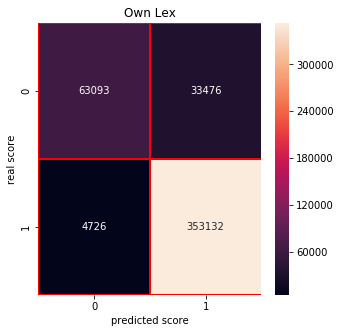

In [109]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(df2['new_label'], df2['lex_label'])
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot =True, linewidth = 0.5, linecolor = "red", fmt = ".0f", ax =ax)
plt.title("Own Lex")
plt.xlabel("predicted score")
plt.ylabel("real score")
plt.yticks( va="center")
model_info(df2['new_label'], df2['lex_label'])

In [111]:
df2.head(2)

,business_id,review_id,text,stars,cool,date,funny,useful,user_id,comp_name,...,NAICS,label,word_count,Lang,clean_text,clean_text2,new_label,lex_score,lex_label,scaled_score
0,eU_713ec6fTGNO4BegRaww,fdiNeiN_hoCxCMy2wTRW9g,I'll be the first to admit that I was not exci...,4,0,1/20/13 13:25,0,0,w31MKYsNFMrjhWxxAb5wIw,La Tavola Italiana,...,Accommodation and Food Services,1,295,en,first admit excited going la tavolta food snob...,first admit excited going la tavolta food snob...,1,0.235556,1,61.665
1,Mem13A3C202RzT53npn4NA,IPw8yWiyqnfBzzWmypUHgg,If you are looking for the best pierogies in P...,5,9,5/13/17 10:41,6,9,5JVY32_bmTBfIGpCCsnAfw,Pierogies Plus,...,Accommodation and Food Services,1,138,en,looking best pierogies pittsburgh place small ...,looking best pierogies pittsburgh place small ...,1,0.330056,1,66.175


In [112]:
len(df2[df2['lex_score'] == 0])

57

In [113]:
def scale_score(x):
    sc = round(((x - (-1))/ (1 - (-1))) * 100,3)
    return(sc)

In [114]:
df2['scaled_score'] = df2['lex_score'].apply(scale_score)

In [115]:
df2.tail(2)

,business_id,review_id,text,stars,cool,date,funny,useful,user_id,comp_name,...,NAICS,label,word_count,Lang,clean_text,clean_text2,new_label,lex_score,lex_label,scaled_score
454425,OBvPj3NiXxt47fjsQ0edsQ,JHmgcQMJkfooh1mytiwk2A,This is the worst strip club I have ever been ...,1,0,4/15/17 10:52,0,1,m-RzWGOQFfUxyUhJJ_zeCQ,Crazy Horse 3 Gentlemen's Club,...,Accommodation and Food Services,0,141,en,worst strip club ever three people went notice...,worst strip club ever three people went notice...,0,-0.454636,0,27.268
454426,Z_mJYg3vi8cPZHa1J4BALw,8ZGC9NVYpiFYTwpgtioxkQ,I have nothing but great things to say about t...,5,1,11/5/18 14:58,0,1,XYf0WzdysIojC2FxkjNStQ,Kindred Restaurant,...,Accommodation and Food Services,1,104,en,nothing great things say restaurant brought de...,nothing great thing say restaurant brought dea...,1,0.397684,1,69.884


In [116]:
max(df2['scaled_score']),min(df2['scaled_score'])

(94.02, 2.643)

In [117]:
df2['scaled_score'].mean()

63.399001421572315

In [118]:
print('Accommodation and Food Services:',round(df2['scaled_score'].mean(),3) )

Accommodation and Food Services: 63.399


In [38]:
def min_max_score(x, minn = 0,maxx = 0):
    sc = round(((x - minn)/ (maxx - minn))* 100,3)
    return(sc)

In [39]:
max(df2['lex_score']),min(df2['lex_score'])

(0.8803984663930483, -0.943060516153672)

In [40]:
df2['min_max_score'] = df2['lex_score'].apply(min_max_score,minn = -0.943060516153672, maxx = 0.8803984663930483 )

In [41]:
max(df2['min_max_score']),min(df2['min_max_score'])

(100.0, 0.0)

In [42]:
df2['min_max_score'].mean()

66.2917457765485

In [43]:
print('-1 to 1 Scale')
print('Accommodation and Food Services:',round(df2['scaled_score'].mean(),3) )
print('Min Max Scale')
print('Accommodation and Food Services:',round(df2['min_max_score'].mean(),3) )

-1 to 1 Scale
Accommodation and Food Services: 63.287
Min Max Scale
Accommodation and Food Services: 66.292
